In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sumbmission = pd.read_csv("sample_submission.csv")

In [3]:
train = pd.read_csv("train_Set.csv")

In [4]:
train.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
test = pd.read_csv("test_set.csv")

In [6]:
test.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [7]:
#checking the shape of train and test dataset:
print('shape of the test dataset is:',test.shape )
print('shape of the train dataset is:',train.shape )

shape of the test dataset is: (5681, 11)
shape of the train dataset is: (8523, 12)


# merging both test and train to clean the dataset

In [8]:
test['source'] ='test'
train['source'] = 'train'

In [9]:
df = pd.concat([test,train])

In [10]:
df.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,source,Item_Outlet_Sales
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,test,NaN
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,test,NaN
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,test,NaN
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,test,NaN
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,test,NaN


In [11]:
print('shape of the combined test & train dataset is :',df.shape )

shape of the combined test & train dataset is : (14204, 13)


# Identifying numerical and categorical columns in df dataset

In [12]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
source                        object
Item_Outlet_Sales            float64
dtype: object

In [13]:
numerical = df.select_dtypes(include = np.number).drop(columns = ['Item_Outlet_Sales','Outlet_Establishment_Year']).columns
categorical = df.select_dtypes(exclude = np.number).columns

In [14]:
print('These are numerical column in dataset',numerical)
print('--'*60)
print('These are categorical column in dataset',categorical)

These are numerical column in dataset Index(['Item_Weight', 'Item_Visibility', 'Item_MRP'], dtype='object')
------------------------------------------------------------------------------------------------------------------------
These are categorical column in dataset Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'source'],
      dtype='object')


In [15]:
#we are checking the categorical columns 
#to get any relations or to get any idea from dataset

df[categorical].apply(lambda x: print(x.value_counts()))

FDY28    10
FDM46    10
FDG46    10
NCQ42    10
FDX50    10
         ..
FDM50     7
FDM10     7
FDH58     7
FDM52     7
FDO33     7
Name: Item_Identifier, Length: 1559, dtype: int64
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64
OUT027    1559
OUT013    1553
OUT049    1550
OUT046    1550
OUT035    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64
Med

Item_Identifier         None
Item_Fat_Content        None
Item_Type               None
Outlet_Identifier       None
Outlet_Size             None
Outlet_Location_Type    None
Outlet_Type             None
source                  None
dtype: object

In [16]:
df["Identifier"] = df["Item_Identifier"].apply(lambda x: x[0:3])

In [17]:
df['Identifier'].value_counts()

FDT    467
FDW    460
FDX    460
FDV    454
FDU    452
      ... 
DRO     27
DRP     19
DRZ     18
DRY      9
DRQ      9
Name: Identifier, Length: 71, dtype: int64

In [18]:
df["Identifier_1"] = df["Item_Identifier"].apply(lambda x: x[0:2])

In [19]:
df['Identifier_1'].value_counts()

FD    10201
NC     2686
DR     1317
Name: Identifier_1, dtype: int64

In [20]:
#here we can combine with any near by colum to get relation ship 

In [21]:
df.groupby(by = ["Identifier_1","Item_Type"])["Item_Identifier"].count()

Identifier_1  Item_Type            
DR            Dairy                     229
              Hard Drinks               362
              Soft Drinks               726
FD            Baking Goods             1086
              Breads                    416
              Breakfast                 186
              Canned                   1084
              Dairy                     907
              Frozen Foods             1426
              Fruits and Vegetables    2013
              Meat                      736
              Seafood                    89
              Snack Foods              1989
              Starchy Foods             269
NC            Health and Hygiene        858
              Household                1548
              Others                    280
Name: Item_Identifier, dtype: int64

In [22]:
#here we can come to conclusion that 
#FD means Foods
#Dr means Drinks
#Nc means Nonconsumables


In [23]:
#next we proceed with Item Fat Content column
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace({"LF": 'Low Fat',"low fat": 'Low Fat',"reg": 'Regular'})

In [24]:
#we have make some changes and make a group of low fat and regular

df['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [25]:
#though we cannot makes any changes in item type
#we can pass over to outlet identifer column
#groupbying and checking any relation ship with idependent variable

df.groupby(["Outlet_Identifier"])["Outlet_Establishment_Year"].value_counts()


Outlet_Identifier  Outlet_Establishment_Year
OUT010             1998                          925
OUT013             1987                         1553
OUT017             2007                         1543
OUT018             2009                         1546
OUT019             1985                          880
OUT027             1985                         1559
OUT035             2004                         1550
OUT045             2002                         1548
OUT046             1997                         1550
OUT049             1999                         1550
Name: Outlet_Establishment_Year, dtype: int64

In [26]:
df['Outlet_Establishment_Year'].value_counts()

1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

In [27]:
outlet = df.groupby(["Outlet_Identifier",'Outlet_Size'])["Outlet_Establishment_Year"].value_counts()
outlet

Outlet_Identifier  Outlet_Size  Outlet_Establishment_Year
OUT013             High         1987                         1553
OUT018             Medium       2009                         1546
OUT019             Small        1985                          880
OUT027             Medium       1985                         1559
OUT035             Small        2004                         1550
OUT046             Small        1997                         1550
OUT049             Medium       1999                         1550
Name: Outlet_Establishment_Year, dtype: int64

In [28]:
#here we can see some datas missing in some columns
#we can identity it

df["Outlet_Size"].isna().value_counts()

False    10188
True      4016
Name: Outlet_Size, dtype: int64

AxesSubplot(0.125,0.11;0.775x0.77)


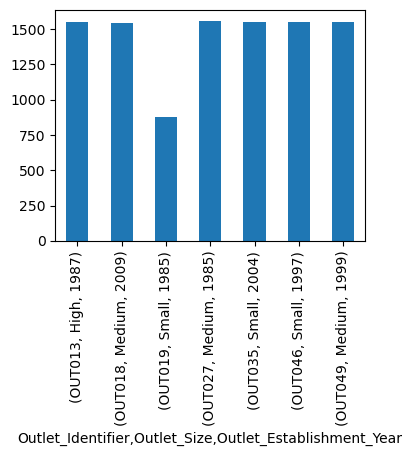

In [29]:
#here we found that in outlet size there are 4016 data missing
#and from above methods we calculated that outlet identifier and outlet size is common for all
#Example if out013 it was established in 1987 and all throught out year only outlet size HIGH is established
#checked for all
#visual representation 
plt.figure(figsize= (4,3))
print(outlet.plot(kind ='bar'))


In [30]:
#we have missing values in the outlet establishment year of 1998,2002,2007
df.groupby("Outlet_Establishment_Year")['Outlet_Size'].agg(lambda x: x.mode() if not x.isna().all() else np.nan)


Outlet_Establishment_Year
1985    Medium
1987      High
1997     Small
1998       NaN
1999    Medium
2002       NaN
2004     Small
2007       NaN
2009    Medium
Name: Outlet_Size, dtype: object

In [31]:
df.groupby(['Outlet_Establishment_Year','Outlet_Location_Type','Outlet_Identifier','Outlet_Type','Outlet_Size'],as_index=False,dropna=False).size()

,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Identifier,Outlet_Type,Outlet_Size,size
0,1985,Tier 1,OUT019,Grocery Store,Small,880
1,1985,Tier 3,OUT027,Supermarket Type3,Medium,1559
2,1987,Tier 3,OUT013,Supermarket Type1,High,1553
3,1997,Tier 1,OUT046,Supermarket Type1,Small,1550
4,1998,Tier 3,OUT010,Grocery Store,NaN,925
5,1999,Tier 1,OUT049,Supermarket Type1,Medium,1550
6,2002,Tier 2,OUT045,Supermarket Type1,NaN,1548
7,2004,Tier 2,OUT035,Supermarket Type1,Small,1550
8,2007,Tier 2,OUT017,Supermarket Type1,NaN,1543
9,2009,Tier 3,OUT018,Supermarket Type2,Medium,1546


In [32]:
#from above we found that 
#for years 1998,2002,2007 
#we can also replace missing values in Oulet size by outlet type
df.groupby(['Outlet_Location_Type','Outlet_Type','Outlet_Size'],as_index= False,dropna =False).size()



,Outlet_Location_Type,Outlet_Type,Outlet_Size,size
0,Tier 1,Grocery Store,Small,880
1,Tier 1,Supermarket Type1,Medium,1550
2,Tier 1,Supermarket Type1,Small,1550
3,Tier 2,Supermarket Type1,Small,1550
4,Tier 2,Supermarket Type1,NaN,3091
5,Tier 3,Grocery Store,NaN,925
6,Tier 3,Supermarket Type1,High,1553
7,Tier 3,Supermarket Type2,Medium,1546
8,Tier 3,Supermarket Type3,Medium,1559


*In this inference we can come to conclusion that 

*For year 1985 Grocery store outlet size is 'Small' and we can imptute 1998 as small in outlet size

*For  year  2004 outlet size is small and it has same  location type "Tier 2" and same as outlettype "Supermarket type 2",so we can impute 2002,2007 as "Samll"as outlet size 

In [33]:
df['Outlet_Size'].fillna("Small",inplace =True)

In [34]:
#looking into the next categorical columns to be imputed
df['Outlet_Location_Type'].isna().value_counts()

False    14204
Name: Outlet_Location_Type, dtype: int64

In [35]:
#since there is no nan values in oulet location 
#we are moving ahead to next columns 
df['Outlet_Type'].isna().value_counts()

False    14204
Name: Outlet_Type, dtype: int64

# calculating the numerical  missing values in dataset

In [39]:
missing_data = [i for i in  df.columns if df[i].isna().sum()> 0]


In [40]:
missing_data

['Item_Weight', 'Item_Outlet_Sales']

*CHECKING THE TOTAL PERCENT OF DATA IS MISSING

In [41]:
print(np.round(df[missing_data].isna().mean()*100,3))

Item_Weight          17.171
Item_Outlet_Sales    39.996
dtype: float64


In [42]:
df["Item_Weight"].isna().value_counts()

False    11765
True      2439
Name: Item_Weight, dtype: int64

# we found that 2439 missing data in item weight as NaN values

* Finding the way to filling na values

In [43]:
df1 = df[(df["Outlet_Establishment_Year"] < 1986) & (df["Outlet_Establishment_Year"] > 1984)]

In [44]:
df1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,source,Item_Outlet_Sales,Identifier,Identifier_1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,test,NaN,FDY,FD
7,FDC48,NaN,Low Fat,0.015782,Baking Goods,81.0592,OUT027,1985,Medium,Tier 3,Supermarket Type3,test,NaN,FDC,FD
12,NCC54,NaN,Low Fat,0.171079,Health and Hygiene,240.4196,OUT019,1985,Small,Tier 1,Grocery Store,test,NaN,NCC,NC
18,NCM42,NaN,Low Fat,0.028184,Household,109.6912,OUT027,1985,Medium,Tier 3,Supermarket Type3,test,NaN,NCM,NC
23,NCL19,NaN,Low Fat,0.027447,Others,142.3470,OUT019,1985,Small,Tier 1,Grocery Store,test,NaN,NCL,NC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,train,6261.8490,DRK,DR
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,train,4111.3150,DRG,DR
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,train,2756.4120,NCN,NC
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,train,487.3656,FDU,FD


In [45]:
#we have found that data that are in 1985 are missing
df1["Item_Weight"].isna().value_counts()

True    2439
Name: Item_Weight, dtype: int64

<AxesSubplot:xlabel='Item_Weight', ylabel='Count'>

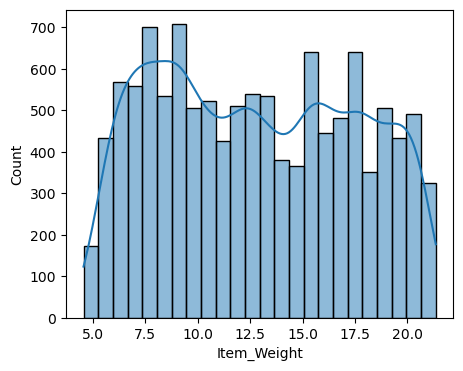

In [46]:
#we can replace nan values by mean or mode
#if we see outliers are present in item weight columns we can go with median method
#if no outliers are present we can go with mean method to replace
df =df.reset_index()


plt.figure(figsize=(5,4))
sns.histplot(data =df, x=df['Item_Weight'],kde =True)

In [47]:
#we can make some groupby method to calculate the item weight respect to other columns

data = df.groupby(['Item_Fat_Content','Outlet_Establishment_Year'])['Item_Weight'].mean()
data

Item_Fat_Content  Outlet_Establishment_Year
Low Fat           1985                               NaN
                  1987                         12.905458
                  1997                         12.928586
                  1998                         12.780445
                  1999                         12.921072
                  2002                         12.913906
                  2004                         12.938847
                  2007                         12.899059
                  2009                         12.914199
Regular           1985                               NaN
                  1987                         12.573588
                  1997                         12.601346
                  1998                         12.619061
                  1999                         12.586508
                  2002                         12.583336
                  2004                         12.558759
                  2007                      

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Item_Weight'>

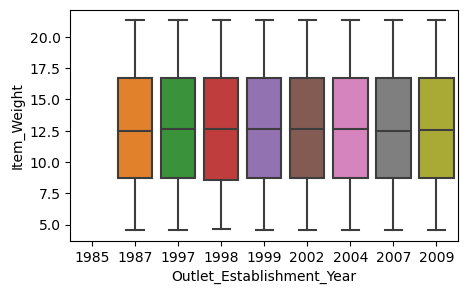

In [48]:
plt.figure(figsize=(5,3))
sns.boxplot(x=df['Outlet_Establishment_Year'],y =df['Item_Weight'])

# From this boxplot we can see the inferneces that:
# 1.Missing value in year 1985
# 2.Every year the mean of Item_Weight is nearby12 to 12.5

In [49]:
df.groupby(['Item_Fat_Content','Item_Type'])['Item_Weight'].mean()


Item_Fat_Content  Item_Type            
Low Fat           Baking Goods             12.581009
                  Breads                   12.067005
                  Breakfast                12.279537
                  Canned                   11.928623
                  Dairy                    13.379983
                  Frozen Foods             12.231772
                  Fruits and Vegetables    12.718596
                  Hard Drinks              11.576205
                  Health and Hygiene       13.171739
                  Household                13.337977
                  Meat                     13.470386
                  Others                   13.915724
                  Seafood                  13.178864
                  Snack Foods              13.737556
                  Soft Drinks              11.883135
                  Starchy Foods            13.712873
Regular           Baking Goods             11.974802
                  Breads                   10.118416
      

In [50]:
df['Item_Weight'].describe()

count    11765.000000
mean        12.792854
std          4.652502
min          4.555000
25%          8.710000
50%         12.600000
75%         16.750000
max         21.350000
Name: Item_Weight, dtype: float64

In [51]:
#we can impute the overall mean becuase the mean of all columns are same 
df['Item_Weight'] = df.groupby('Item_Type').Item_Weight.transform(lambda x: x.fillna(x.mean()))


<AxesSubplot:xlabel='Item_Weight', ylabel='Count'>

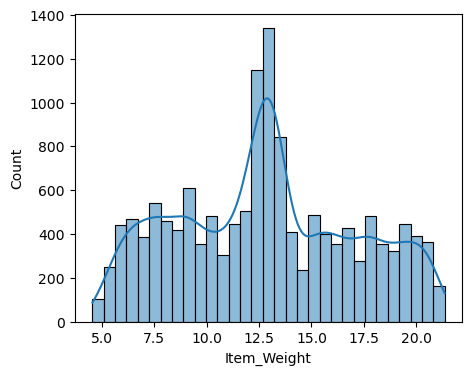

In [52]:
plt.figure(figsize=(5,4))
sns.histplot(data =df, x=df['Item_Weight'],kde =True)

<AxesSubplot:xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

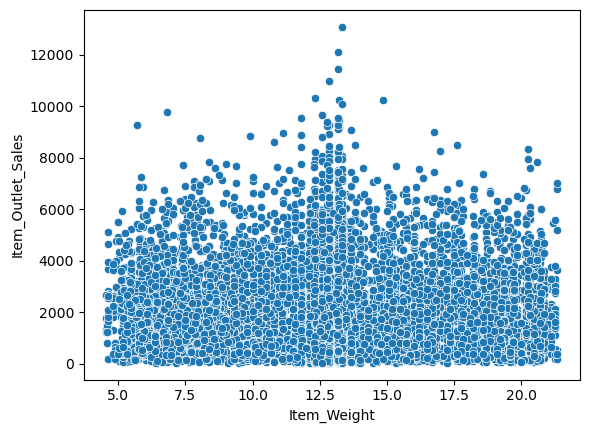

In [53]:
sns.scatterplot(x= df['Item_Weight'],y=df['Item_Outlet_Sales'])

In [54]:
df[numerical].isna().sum()

Item_Weight        0
Item_Visibility    0
Item_MRP           0
dtype: int64

# Detection of Outliers in Numerical columns

In [55]:
print(numerical)

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP'], dtype='object')


In [56]:
print(categorical)

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'source'],
      dtype='object')


In [57]:
#we can use boxplot to identify outlier and by wiriting code to get ouliers by low and upper whisker range
for num_data in numerical:
    print(num_data)        
    q1 = df[num_data].quantile(0.25)
    q2 = df[num_data].quantile(0.50)
    q3 = df[num_data].quantile(0.75)
    iqr = q3-q1
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    print('The Q1  0.25quantile value is ',q1)
    print('The Q1  0.50quantile value is ',q2)
    print('The Q1  0.75quantile value is ',q3)
    print("iqr value is",iqr)
    print("Low Whisker",low)
    print("High Whishker",high)
    print('--'*30)
    

Item_Weight
The Q1  0.25quantile value is  9.3
The Q1  0.50quantile value is  12.8
The Q1  0.75quantile value is  16.0
iqr value is 6.699999999999999
Low Whisker -0.7499999999999982
High Whishker 26.049999999999997
------------------------------------------------------------
Item_Visibility
The Q1  0.25quantile value is  0.027035682499999998
The Q1  0.50quantile value is  0.054020536499999994
The Q1  0.75quantile value is  0.0940372535
iqr value is 0.06700157100000001
Low Whisker -0.07346667400000001
High Whishker 0.19453961000000003
------------------------------------------------------------
Item_MRP
The Q1  0.25quantile value is  94.012
The Q1  0.50quantile value is  142.247
The Q1  0.75quantile value is  185.8556
iqr value is 91.84360000000001
Low Whisker -43.7534
High Whishker 323.621
------------------------------------------------------------


In [58]:
outlier = df[(df['Item_Weight'] < -0.7499999999999982 ) | (df['Item_Weight']  > 26.049999999999997 ) ].value_counts()
pd.DataFrame(outlier)

,,,,,,,,,,,,,,,,0
index,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,source,Item_Outlet_Sales,Identifier,Identifier_1,


In [59]:
outlier_1 = df[(df['Item_Visibility'] < -0.07346667400000001 ) | (df['Item_Visibility']  > 0.19453961000000003 ) ]
outlier_1['Item_Visibility'].count()


261

In [60]:
outlier_2 = df[(df['Item_MRP'] < -43.7534 ) | (df['Item_MRP']  > 323.621 ) ]
outlier_2['Item_MRP'].count()


0

<AxesSubplot:xlabel='Item_Visibility'>

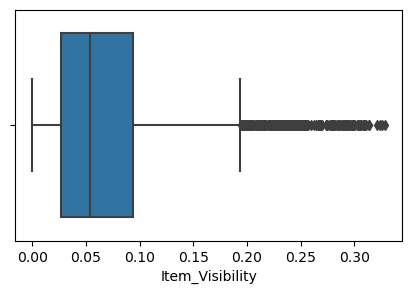

In [79]:
#we can boxplot method to visulaize the outliers
plt.figure(figsize= (5,3))
sns.boxplot(data= df,x=df['Item_Visibility'])

In [80]:
#we can see there are outliers in "Item_Visibilty column"
#hence we can impute outliers with the help of IQR values
#we can use Lower whisker and Higher whisker value

df['Item_Visibility']= df['Item_Visibility'].apply(lambda x: 0.1945 if x > 0.1945 else (-0.0734 if x < -0.0734 else x))

<AxesSubplot:xlabel='Item_Visibility'>

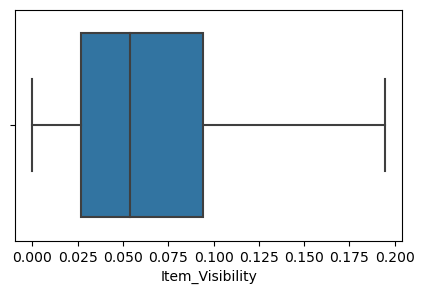

In [82]:
plt.figure(figsize=(5,3))
sns.boxplot(data= df, x =df['Item_Visibility'])

# we have cleaned the dataset with missing values,we can check now corrleation of train set

In [93]:
train = df.loc[df['source']=='train']
test = df.loc[df['source'] == 'test']
df.sort_index()

,index,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,source,Item_Outlet_Sales,Identifier,Identifier_1
0,0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,test,NaN,FDW,FD
1,1,FDW14,8.300000,Regular,0.038428,Dairy,87.3198,OUT017,2007,Small,Tier 2,Supermarket Type1,test,NaN,FDW,FD
2,2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,Small,Tier 3,Grocery Store,test,NaN,NCN,NC
3,3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Small,Tier 2,Supermarket Type1,test,NaN,FDQ,FD
4,4,FDY38,13.238358,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,test,NaN,FDY,FD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,8518,FDF22,6.865000,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,train,2778.3834,FDF,FD
14200,8519,FDS36,8.380000,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Small,Tier 2,Supermarket Type1,train,549.2850,FDS,FD
14201,8520,NCJ29,10.600000,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,train,1193.1136,NCJ,NC
14202,8521,FDN46,7.210000,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,train,1845.5976,FDN,FD


<AxesSubplot:>

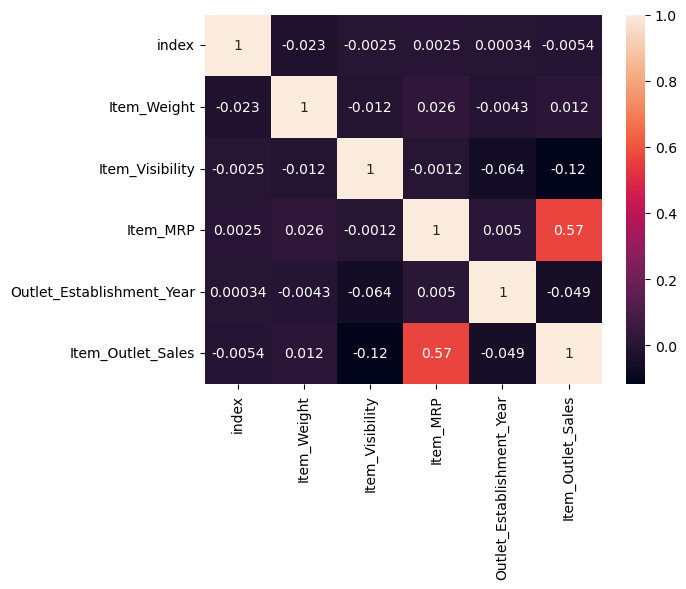

In [96]:
corr_ = train.corr()
sns.heatmap(corr_,annot = True)

In [140]:
#as of our inference still there was not much corrleation,we can make to get best fit line as trial and error method

In [97]:
#we can only keep on dependent variable alone for test and trian dataset
df.drop(columns = ['Outlet_Establishment_Year','Identifier','Item_Identifier'],inplace = True)

In [98]:
train = df.loc[df['source']=='train']
test = df.loc[df['source'] == 'test']

In [99]:
#we can remove source columns also
train.drop(columns = 'source',inplace = True)
test.drop(columns = 'source',inplace = True)
     

C:\Users\sankar\AppData\Local\Temp\ipykernel_10740\233847947.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(columns = 'source',inplace = True)
C:\Users\sankar\AppData\Local\Temp\ipykernel_10740\233847947.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop(columns = 'source',inplace = True)


In [100]:
#we can now check the variation inflation factor of numerical columns
#import libraby for it
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [101]:
X = train.select_dtypes(include = np.number).drop(columns = 'Item_Outlet_Sales')
vif_df = pd.DataFrame()
vif_df['features'] = X.columns

vif_df['VIF'] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]

In [102]:
vif_df[1:]

,features,VIF
1,Item_Weight,5.545739
2,Item_Visibility,2.527355
3,Item_MRP,4.680171


In [103]:
#creating test train split
from sklearn.model_selection import train_test_split


In [107]:
X_train, X_test, y_train, y_test  = train_test_split(X,train['Item_Outlet_Sales'], test_size = 0.25, shuffle = True)


In [108]:
X_train

,index,Item_Weight,Item_Visibility,Item_MRP
10535,4854,8.050000,0.078400,259.0646
8445,2764,12.340830,0.026552,56.2246
10618,4937,8.275000,0.110198,104.2306
13085,7404,7.035000,0.021883,263.7910
11670,5989,5.820000,0.080804,171.4790
...,...,...,...,...
10568,4887,5.655000,0.175793,146.9102
6800,1119,18.350000,0.148939,191.9504
10904,5223,13.194406,0.014296,242.6512
9088,3407,13.337977,0.013056,215.9192


In [110]:
#intializing the regression model
#writing necessary code 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [111]:
model = LinearRegression()  


In [112]:
model.fit(X_train, y_train)


LinearRegression()

In [113]:
model.coef_


array([-2.72144279e-03, -2.22335137e+00, -4.15931545e+03,  1.54453593e+01])

In [114]:
model.intercept_


309.1457936436502

In [115]:
y_predicted_train = model.predict(X_train)


In [116]:
y_predicted_Test = model.predict(X_test)


In [117]:
print("The train MSE is:",mean_squared_error(y_train,y_predicted_train))
print("The test MSSE is:",mean_squared_error(y_test,y_predicted_Test))

The train MSE is: 1921584.317143421
The test MSSE is: 1971045.1177403752


In [118]:
print("The train RMSSE is:",np.sqrt(mean_squared_error(y_train,y_predicted_train)))
print("The test RMSSE is:",np.sqrt(mean_squared_error(y_test,y_predicted_Test)))

The train RMSSE is: 1386.212219374588
The test RMSSE is: 1403.9391431755064


In [119]:
r2_score(y_train,y_predicted_train)


0.3357846836562236

C:\Users\sankar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

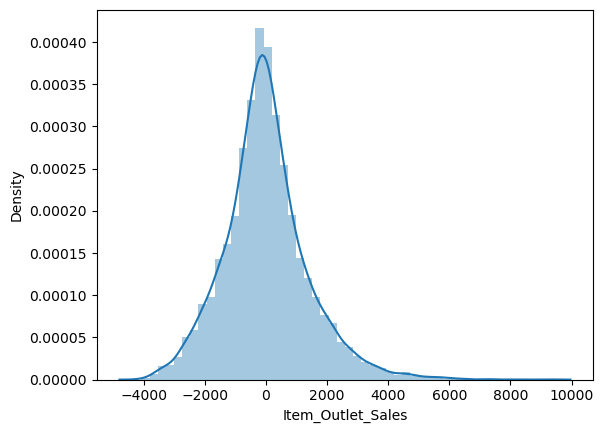

In [120]:
Deviations = y_train - y_predicted_train 
sns.distplot(Deviations)

In [122]:
df.to_excel("Pre_processed_Data.xlsx",index = False)
